# Figure 4

In [30]:
import scanpy as sc
import convexgating as cg
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [200]:
def get_f1_hierarch(perf_loc):
    tab = pd.read_csv(perf_loc)
    #tab = pd.read_csv('level_' +str(level) + '/cluster_' + celltype + '/performance.csv')
    best_loc_f1 = np.argmax(tab.iloc[0][1:])
    f1 = tab.iloc[0][1:][best_loc_f1]
    recall = tab.iloc[1][1:][best_loc_f1]
    precision = tab.iloc[2][1:][best_loc_f1]
    hierarchy = best_loc_f1 + 1
    return f1,recall,precision,hierarchy

def get_f1_hierarch_max2hierarch(perf_loc):
    tab = pd.read_csv(perf_loc)
    #tab = pd.read_csv('level_' +str(level) + '/cluster_' + celltype + '/performance.csv')
    best_loc_f1 = np.argmax(tab.iloc[0][1:])
    if best_loc_f1 > 1:
        best_loc_f1 = 1
    f1 = tab.iloc[0][1:][best_loc_f1]
    recall = tab.iloc[1][1:][best_loc_f1]
    precision = tab.iloc[2][1:][best_loc_f1]
    hierarchy = best_loc_f1 + 1
    return f1,recall,precision,hierarchy

def add_ID(df):
    df['ID'] = df['sample'] + '_' + df['cell_type'] + '_' + df['level'].astype(str) 
    return df

def process_hypergate_results_f1(df):
    df_f1 = df[(df['set_size'] == 'full')&(df['score'] == 'f1')]
    return df_f1
def process_hypergate_results_recall(df):
    df_recall = df[(df['set_size'] == 'full')&(df['score'] == 'recall')]
    return df_recall
def process_hypergate_results_precision(df):
    df_precision = df[(df['set_size'] == 'full')&(df['score'] == 'precision')]
    return df_precision

# Oetjen

### ConvexGating 

In [250]:
samples = ['A','B','C','H','J','O','T','U'] 
cluster_lvl2 = ['cluster_T cell','cluster_NK cell']
cluster_lvl3 = ['cluster_CD4+ T cell','cluster_CD8+ T cell','cluster_Double negative T cell','cluster_Double positive T cell',
 'cluster_NK cell']
cluster_lvl4 = ['cluster_CCR7- CD4+ T cell',
 'cluster_CCR7+ CD4+ T cell',
 'cluster_CCR7- CD8+ T cell',
 'cluster_CCR7+ CD8+ T cell',
'cluster_Double negative T cell',
'cluster_Double positive T cell',
'cluster_NK cell']


cluster_lvl5 = ['cluster_CD4+ CM T cell','cluster_CD4+ TEMRA','cluster_CD8+ CM T cell','cluster_CD8+ TE T cell','cluster_Double negative T cell','cluster_NK cell','cluster_Naive CD8+ T cell',
'cluster_CD4+ EM T cell','cluster_CD4+ TRM T cell','cluster_CD8+ EM T cell','cluster_CD8+ TRM T cell','cluster_Double positive T cell','cluster_Naive CD4+ T cell']

gating_dir_lvl2 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_5\\P02_cell_type_lvl2_hull' 
oetjen_cg_lvl2 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl2:
        perf_loc = os.path.join(gating_dir_lvl2,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = get_f1_hierarch(perf_loc)
        oetjen_cg_lvl2 = oetjen_cg_lvl2.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
oetjen_cg_lvl2['level'] = 'lvl2'

gating_dir_lvl3 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_5\\P02_cell_type_lvl3_hull' 
oetjen_cg_lvl3 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl3:
        perf_loc = os.path.join(gating_dir_lvl3,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = get_f1_hierarch(perf_loc)
        oetjen_cg_lvl3 = oetjen_cg_lvl3.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
oetjen_cg_lvl3['level'] = 'lvl3'

gating_dir_lvl4 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_5\\P02_cell_type_lvl4_hull' 
oetjen_cg_lvl4 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl4:
        perf_loc = os.path.join(gating_dir_lvl4,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = get_f1_hierarch(perf_loc)
        oetjen_cg_lvl4 = oetjen_cg_lvl4.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
oetjen_cg_lvl4['level'] = 'lvl4'

gating_dir_lvl5 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_5\\P02_cell_type_lvl5_hull' 
oetjen_cg_lvl5 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl5:
        perf_loc = os.path.join(gating_dir_lvl5,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = get_f1_hierarch(perf_loc)
        oetjen_cg_lvl5 = oetjen_cg_lvl5.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))

oetjen_cg_lvl2['tool'] = 'ConvexGating'
oetjen_cg_lvl2['level'] = 2

oetjen_cg_lvl3['tool'] = 'ConvexGating'
oetjen_cg_lvl3['level'] = 3

oetjen_cg_lvl4['tool'] = 'ConvexGating'
oetjen_cg_lvl4['level'] = 4

oetjen_cg_lvl5['tool'] = 'ConvexGating'
oetjen_cg_lvl5['level'] = 5

oetjen_cg_lvl2['cell_type'] = oetjen_cg_lvl2['cluster'].str[8:]
oetjen_cg_lvl3['cell_type'] = oetjen_cg_lvl3['cluster'].str[8:]
oetjen_cg_lvl4['cell_type'] = oetjen_cg_lvl4['cluster'].str[8:]
oetjen_cg_lvl5['cell_type'] = oetjen_cg_lvl5['cluster'].str[8:]

oetjen_cg_lvl2 = add_ID(oetjen_cg_lvl2)
oetjen_cg_lvl3 = add_ID(oetjen_cg_lvl3)
oetjen_cg_lvl4 = add_ID(oetjen_cg_lvl4)
oetjen_cg_lvl5 = add_ID(oetjen_cg_lvl5)

oetjen_cg_lvl2 = oetjen_cg_lvl2.rename(columns={'f1': 'f1_cg'})
oetjen_cg_lvl3 = oetjen_cg_lvl3.rename(columns={'f1': 'f1_cg'})
oetjen_cg_lvl4 = oetjen_cg_lvl4.rename(columns={'f1': 'f1_cg'})
oetjen_cg_lvl5 = oetjen_cg_lvl5.rename(columns={'f1': 'f1_cg'})

oetjen_cg_lvl2 = oetjen_cg_lvl2.rename(columns={'recall': 'recall_cg'})
oetjen_cg_lvl3 = oetjen_cg_lvl3.rename(columns={'recall': 'recall_cg'})
oetjen_cg_lvl4 = oetjen_cg_lvl4.rename(columns={'recall': 'recall_cg'})
oetjen_cg_lvl5 = oetjen_cg_lvl5.rename(columns={'recall': 'recall_cg'})

oetjen_cg_lvl2 = oetjen_cg_lvl2.rename(columns={'precision': 'precision_cg'})
oetjen_cg_lvl3 = oetjen_cg_lvl3.rename(columns={'precision': 'precision_cg'})
oetjen_cg_lvl4 = oetjen_cg_lvl4.rename(columns={'precision': 'precision_cg'})
oetjen_cg_lvl5 = oetjen_cg_lvl5.rename(columns={'precision': 'precision_cg'})

### Hypergate

In [144]:
oetjen_hypergate_path_lvl2 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_4\\data\\Hypergate\\cytof_data_tmp_cell_type_lvl2_hypergate.csv'
oetjen_hypergate_path_lvl3 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_4\\data\\Hypergate\\cytof_data_tmp_cell_type_lvl3_hypergate.csv'
oetjen_hypergate_path_lvl4 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_4\\data\\Hypergate\\cytof_data_tmp_cell_type_lvl4_hypergate.csv'
oetjen_hypergate_path_lvl5 = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_4\\data\\Hypergate\\cytof_data_tmp_cell_type_lvl5_hypergate.csv'

In [232]:
oetjen_hypergate_lvl2 = pd.read_csv(oetjen_hypergate_path_lvl2,index_col =0)
oetjen_hypergate_lvl3 = pd.read_csv(oetjen_hypergate_path_lvl3,index_col =0)
oetjen_hypergate_lvl4 = pd.read_csv(oetjen_hypergate_path_lvl4,index_col =0)
oetjen_hypergate_lvl5 = pd.read_csv(oetjen_hypergate_path_lvl5,index_col =0)

### Linear SVM

In [292]:
oetjen_linear_svm_path = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_4\\data\\performance_linsvm\\svm_linear\\Oetjen_data\\'

oetjen_linear_svm_sub_lv2 = pd.read_csv(oetjen_linear_svm_path +
                                   'cytof_data_tmp_cell_type_lvl2_sub_linear_svm_overview.csv',index_col = 0)
oetjen_linear_svm_sub_lv2 = oetjen_linear_svm_sub_lv2[oetjen_linear_svm_sub_lv2['celltype'] != 'not annotated']


oetjen_linear_svm_sub_lv3 = pd.read_csv(oetjen_linear_svm_path +
                                   'cytof_data_tmp_cell_type_lvl3_sub_linear_svm_overview.csv',index_col = 0)
oetjen_linear_svm_sub_lv3 = oetjen_linear_svm_sub_lv3[oetjen_linear_svm_sub_lv3['celltype'] != 'not annotated']

oetjen_linear_svm_sub_lv4 = pd.read_csv(oetjen_linear_svm_path +
                                   'cytof_data_tmp_cell_type_lvl4_sub_linear_svm_overview.csv',index_col = 0)
oetjen_linear_svm_sub_lv4 = oetjen_linear_svm_sub_lv4[oetjen_linear_svm_sub_lv4['celltype'] != 'not annotated']

oetjen_linear_svm_sub_lv5 = pd.read_csv(oetjen_linear_svm_path +
                                   'cytof_data_tmp_cell_type_lvl5_sub_linear_svm_overview.csv',index_col = 0)
oetjen_linear_svm_sub_lv5 = oetjen_linear_svm_sub_lv5[oetjen_linear_svm_sub_lv5['celltype'] != 'not annotated']

oetjen_linear_svm_sub_lv2['cell_type'] = oetjen_linear_svm_sub_lv2['celltype']
oetjen_linear_svm_sub_lv3['cell_type'] = oetjen_linear_svm_sub_lv3['celltype']
oetjen_linear_svm_sub_lv4['cell_type'] = oetjen_linear_svm_sub_lv4['celltype']
oetjen_linear_svm_sub_lv5['cell_type'] = oetjen_linear_svm_sub_lv5['celltype']

oetjen_linear_svm_sub_lv2['level'] = 2
oetjen_linear_svm_sub_lv3['level'] = 3
oetjen_linear_svm_sub_lv4['level'] = 4
oetjen_linear_svm_sub_lv5['level'] = 5 

oetjen_lin_svm_lvl2 = add_ID(oetjen_linear_svm_sub_lv2)
oetjen_lin_svm_lvl3 = add_ID(oetjen_linear_svm_sub_lv3)
oetjen_lin_svm_lvl4 = add_ID(oetjen_linear_svm_sub_lv4)
oetjen_lin_svm_lvl5 = add_ID(oetjen_linear_svm_sub_lv5)

oetjen_lin_svm_lvl2 = oetjen_lin_svm_lvl2.rename(columns={'f1': 'f1_lin_svm'})
oetjen_lin_svm_lvl3 = oetjen_lin_svm_lvl3.rename(columns={'f1': 'f1_lin_svm'})
oetjen_lin_svm_lvl4 = oetjen_lin_svm_lvl4.rename(columns={'f1': 'f1_lin_svm'})
oetjen_lin_svm_lvl5 = oetjen_lin_svm_lvl5.rename(columns={'f1': 'f1_lin_svm'})

oetjen_lin_svm_lvl2 = oetjen_lin_svm_lvl2.rename(columns={'recall': 'recall_lin_svm'})
oetjen_lin_svm_lvl3 = oetjen_lin_svm_lvl3.rename(columns={'recall': 'recall_lin_svm'})
oetjen_lin_svm_lvl4 = oetjen_lin_svm_lvl4.rename(columns={'recall': 'recall_lin_svm'})
oetjen_lin_svm_lvl5 = oetjen_lin_svm_lvl5.rename(columns={'recall': 'recall_lin_svm'})

oetjen_lin_svm_lvl2 = oetjen_lin_svm_lvl2.rename(columns={'precision': 'precision_lin_svm'})
oetjen_lin_svm_lvl3 = oetjen_lin_svm_lvl3.rename(columns={'precision': 'precision_lin_svm'})
oetjen_lin_svm_lvl4 = oetjen_lin_svm_lvl4.rename(columns={'precision': 'precision_lin_svm'})
oetjen_lin_svm_lvl5 = oetjen_lin_svm_lvl5.rename(columns={'precision': 'precision_lin_svm'})

### RBF svm

In [21]:
oetjen_rbf_svm_path = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_4\\data\\performance_rbfsvm\\svm_rbf\\Oetjen_data\\'

oetjen_rbf_svm_sub_lv2 = pd.read_csv(oetjen_rbf_svm_path +
                                   'cytof_data_tmp_cell_type_lvl2_sub_rbf_svm_overview.csv',index_col = 0)
oetjen_rbf_svm_sub_lv2 = oetjen_rbf_svm_sub_lv2[oetjen_rbf_svm_sub_lv2['celltype'] != 'not annotated']


oetjen_rbf_svm_sub_lv3 = pd.read_csv(oetjen_rbf_svm_path +
                                   'cytof_data_tmp_cell_type_lvl3_sub_rbf_svm_overview.csv',index_col = 0)
oetjen_rbf_svm_sub_lv3 = oetjen_rbf_svm_sub_lv3[oetjen_rbf_svm_sub_lv3['celltype'] != 'not annotated']

oetjen_rbf_svm_sub_lv4 = pd.read_csv(oetjen_rbf_svm_path +
                                   'cytof_data_tmp_cell_type_lvl4_sub_rbf_svm_overview.csv',index_col = 0)
oetjen_rbf_svm_sub_lv4 = oetjen_rbf_svm_sub_lv4[oetjen_rbf_svm_sub_lv4['celltype'] != 'not annotated']

oetjen_rbf_svm_sub_lv5 = pd.read_csv(oetjen_rbf_svm_path +
                                   'cytof_data_tmp_cell_type_lvl5_sub_rbf_svm_overview.csv',index_col = 0)
oetjen_rbf_svm_sub_lv5 = oetjen_rbf_svm_sub_lv5[oetjen_rbf_svm_sub_lv5['celltype'] != 'not annotated']

### visualize

In [ ]:
oetjen_hypergate_lvl2_f1 = process_hypergate_results_f1(oetjen_hypergate_lvl2)
oetjen_hypergate_lvl3_f1 = process_hypergate_results_f1(oetjen_hypergate_lvl3)
oetjen_hypergate_lvl4_f1 = process_hypergate_results_f1(oetjen_hypergate_lvl4)
oetjen_hypergate_lvl5_f1 = process_hypergate_results_f1(oetjen_hypergate_lvl5)

oetjen_hypergate_lvl2_f1['level'] = 2
oetjen_hypergate_lvl3_f1['level'] = 3
oetjen_hypergate_lvl4_f1['level'] = 4
oetjen_hypergate_lvl5_f1['level'] = 5 

oetjen_hypergate_lvl2_f1 = add_ID(oetjen_hypergate_lvl2_f1)
oetjen_hypergate_lvl3_f1 = add_ID(oetjen_hypergate_lvl3_f1)
oetjen_hypergate_lvl4_f1 = add_ID(oetjen_hypergate_lvl4_f1)
oetjen_hypergate_lvl5_f1 = add_ID(oetjen_hypergate_lvl5_f1)

oetjen_hypergate_lvl2_f1 = oetjen_hypergate_lvl2_f1.rename(columns={'value': 'f1_hypergate'})
oetjen_hypergate_lvl3_f1 = oetjen_hypergate_lvl3_f1.rename(columns={'value': 'f1_hypergate'})
oetjen_hypergate_lvl4_f1 = oetjen_hypergate_lvl4_f1.rename(columns={'value': 'f1_hypergate'})
oetjen_hypergate_lvl5_f1 = oetjen_hypergate_lvl5_f1.rename(columns={'value': 'f1_hypergate'})

oetjen_hypergate_lvl2_precision = process_hypergate_results_precision(oetjen_hypergate_lvl2)
oetjen_hypergate_lvl3_precision = process_hypergate_results_precision(oetjen_hypergate_lvl3)
oetjen_hypergate_lvl4_precision = process_hypergate_results_precision(oetjen_hypergate_lvl4)
oetjen_hypergate_lvl5_precision = process_hypergate_results_precision(oetjen_hypergate_lvl5)

oetjen_hypergate_lvl2_precision['level'] = 2
oetjen_hypergate_lvl3_precision['level'] = 3
oetjen_hypergate_lvl4_precision['level'] = 4
oetjen_hypergate_lvl5_precision['level'] = 5 

oetjen_hypergate_lvl2_precision = add_ID(oetjen_hypergate_lvl2_precision)
oetjen_hypergate_lvl3_precision = add_ID(oetjen_hypergate_lvl3_precision)
oetjen_hypergate_lvl4_precision = add_ID(oetjen_hypergate_lvl4_precision)
oetjen_hypergate_lvl5_precision = add_ID(oetjen_hypergate_lvl5_precision)

oetjen_hypergate_lvl2_precision = oetjen_hypergate_lvl2_precision.rename(columns={'value': 'precision_hypergate'})
oetjen_hypergate_lvl3_precision = oetjen_hypergate_lvl3_precision.rename(columns={'value': 'precision_hypergate'})
oetjen_hypergate_lvl4_precision = oetjen_hypergate_lvl4_precision.rename(columns={'value': 'precision_hypergate'})
oetjen_hypergate_lvl5_precision = oetjen_hypergate_lvl5_precision.rename(columns={'value': 'precision_hypergate'})

oetjen_hypergate_lvl2_recall = process_hypergate_results_recall(oetjen_hypergate_lvl2)
oetjen_hypergate_lvl3_recall = process_hypergate_results_recall(oetjen_hypergate_lvl3)
oetjen_hypergate_lvl4_recall = process_hypergate_results_recall(oetjen_hypergate_lvl4)
oetjen_hypergate_lvl5_recall = process_hypergate_results_recall(oetjen_hypergate_lvl5)

oetjen_hypergate_lvl2_recall['level'] = 2
oetjen_hypergate_lvl3_recall['level'] = 3
oetjen_hypergate_lvl4_recall['level'] = 4
oetjen_hypergate_lvl5_recall['level'] = 5 

oetjen_hypergate_lvl2_recall = add_ID(oetjen_hypergate_lvl2_recall)
oetjen_hypergate_lvl3_recall = add_ID(oetjen_hypergate_lvl3_recall)
oetjen_hypergate_lvl4_recall = add_ID(oetjen_hypergate_lvl4_recall)
oetjen_hypergate_lvl5_recall = add_ID(oetjen_hypergate_lvl5_recall)

oetjen_hypergate_lvl2_recall = oetjen_hypergate_lvl2_recall.rename(columns={'value': 'recall_hypergate'})
oetjen_hypergate_lvl3_recall = oetjen_hypergate_lvl3_recall.rename(columns={'value': 'recall_hypergate'})
oetjen_hypergate_lvl4_recall = oetjen_hypergate_lvl4_recall.rename(columns={'value': 'recall_hypergate'})
oetjen_hypergate_lvl5_recall = oetjen_hypergate_lvl5_recall.rename(columns={'value': 'recall_hypergate'})

In [297]:
comp_oetjen_lvl2_f1 = oetjen_cg_lvl2.merge(oetjen_hypergate_lvl2_f1, on = 'ID')[['f1_hypergate','f1_cg']]
comp_oetjen_lvl3_f1 = oetjen_cg_lvl3.merge(oetjen_hypergate_lvl3_f1, on = 'ID')[['f1_hypergate','f1_cg']]
comp_oetjen_lvl4_f1 = oetjen_cg_lvl4.merge(oetjen_hypergate_lvl4_f1, on = 'ID')[['f1_hypergate','f1_cg']]
comp_oetjen_lvl5_f1 = oetjen_cg_lvl5.merge(oetjen_hypergate_lvl5_f1, on = 'ID')[['f1_hypergate','f1_cg']]

In [299]:
comp_oetjen_lvl2_precision = oetjen_cg_lvl2.merge(oetjen_hypergate_lvl2_precision, on = 'ID')[['precision_hypergate','precision_cg']]
comp_oetjen_lvl3_precision = oetjen_cg_lvl3.merge(oetjen_hypergate_lvl3_precision, on = 'ID')[['precision_hypergate','precision_cg']]
comp_oetjen_lvl4_precision = oetjen_cg_lvl4.merge(oetjen_hypergate_lvl4_precision, on = 'ID')[['precision_hypergate','precision_cg']]
comp_oetjen_lvl5_precision = oetjen_cg_lvl5.merge(oetjen_hypergate_lvl5_precision, on = 'ID')[['precision_hypergate','precision_cg']]

In [300]:
comp_oetjen_lvl2_recall = oetjen_cg_lvl2.merge(oetjen_hypergate_lvl2_recall, on = 'ID')[['recall_hypergate','recall_cg']]
comp_oetjen_lvl3_recall = oetjen_cg_lvl3.merge(oetjen_hypergate_lvl3_recall, on = 'ID')[['recall_hypergate','recall_cg']]
comp_oetjen_lvl4_recall = oetjen_cg_lvl4.merge(oetjen_hypergate_lvl4_recall, on = 'ID')[['recall_hypergate','recall_cg']]
comp_oetjen_lvl5_recall = oetjen_cg_lvl5.merge(oetjen_hypergate_lvl5_recall, on = 'ID')[['recall_hypergate','recall_cg']]

#### CG vs. hypergate

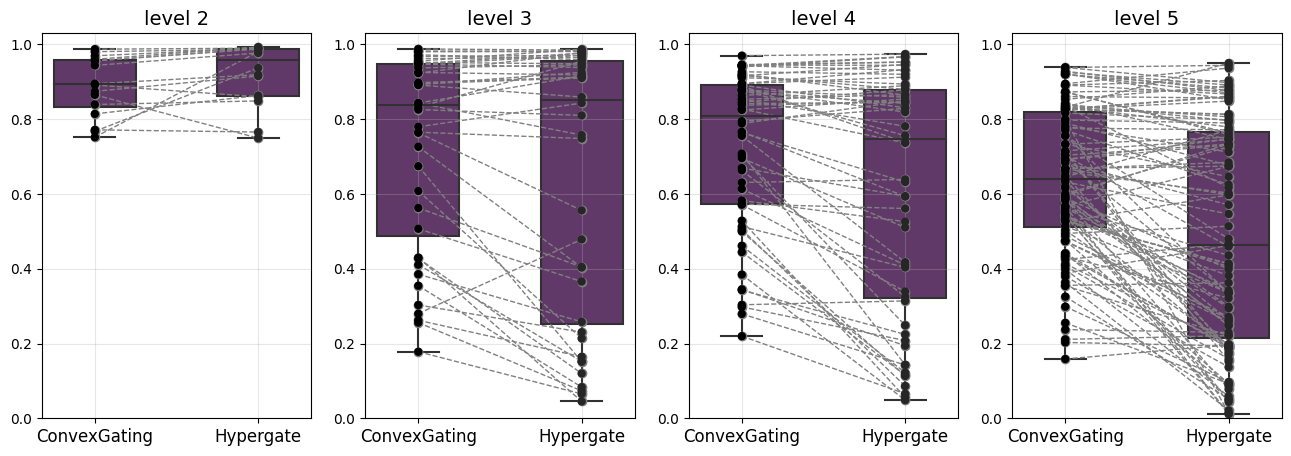

In [319]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
#Oetjen f1
sns.boxplot(data=comp_oetjen_lvl2_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_hypergate': 'Hypergate'}),order = ['ConvexGating','Hypergate'],width=0.5,ax = axes[0],color = '#663171')
sns.stripplot(data=comp_oetjen_lvl2_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_hypergate'],ax = axes[0])
for i in range(len(comp_oetjen_lvl2_f1)):
    axes[0].plot([0, 1], [comp_oetjen_lvl2_f1['f1_cg'][i], comp_oetjen_lvl2_f1['f1_hypergate'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 2',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl3_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_hypergate': 'Hypergate'}),order = ['ConvexGating','Hypergate'],width=0.5,ax = axes[1],color = '#663171')
sns.stripplot(data=comp_oetjen_lvl3_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_hypergate'],ax = axes[1])
for i in range(len(comp_oetjen_lvl3_f1)):
    axes[1].plot([0, 1], [comp_oetjen_lvl3_f1['f1_cg'][i], comp_oetjen_lvl3_f1['f1_hypergate'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 3',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl4_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_hypergate': 'Hypergate'}),order = ['ConvexGating','Hypergate'],width=0.5,ax = axes[2],color = '#663171')
sns.stripplot(data=comp_oetjen_lvl4_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_hypergate'],ax = axes[2])
for i in range(len(comp_oetjen_lvl4_f1)):
    axes[2].plot([0, 1], [comp_oetjen_lvl4_f1['f1_cg'][i], comp_oetjen_lvl4_f1['f1_hypergate'][i]], '--o', color='grey', linewidth=1)
#axes[2].set_xlabel('Conditions')
axes[2].set_title('level 4',fontsize = 14)
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=12) 
axes[2].set_ylim([0,1.03])
axes[2].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl5_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_hypergate': 'Hypergate'}),order = ['ConvexGating','Hypergate'],width=0.5,ax = axes[3],color = '#663171')
sns.stripplot(data=comp_oetjen_lvl5_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_hypergate'],ax = axes[3])
for i in range(len(comp_oetjen_lvl5_f1)):
    axes[3].plot([0, 1], [comp_oetjen_lvl5_f1['f1_cg'][i], comp_oetjen_lvl5_f1['f1_hypergate'][i]], '--o', color='grey', linewidth=1)
#axes[3].set_xlabel('Conditions')
axes[3].set_title('level 5',fontsize = 14)
axes[3].set_xticklabels(axes[3].get_xticklabels(), fontsize=12) 
axes[3].set_ylim([0,1.03])
axes[3].grid(True,alpha = 0.3)
plt.savefig('figures/Q01_cg_hypergate_oetjen_f1.pdf',bbox_inches='tight')

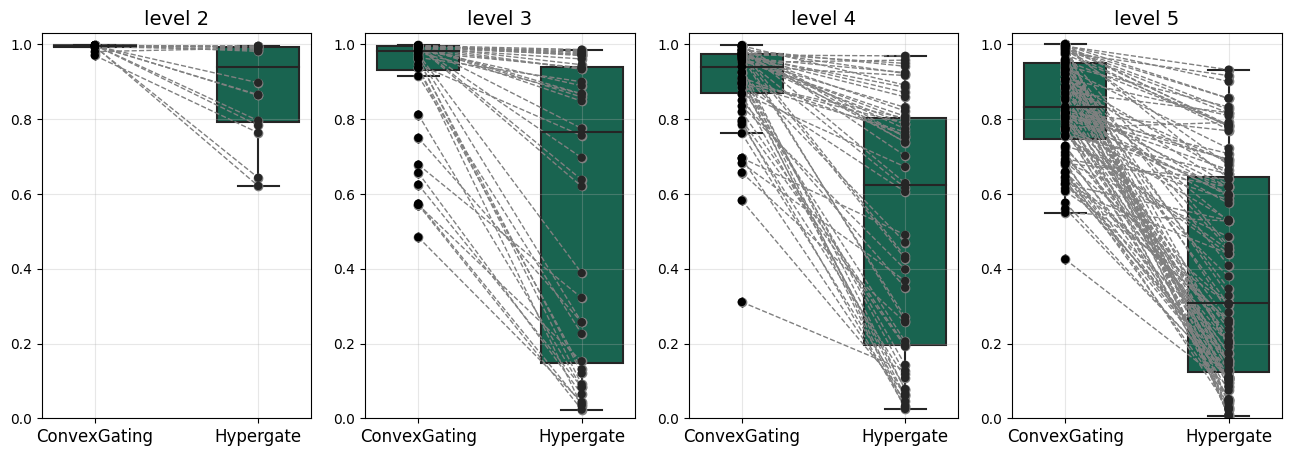

In [320]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
#Oetjen precision
sns.boxplot(data=comp_oetjen_lvl2_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_hypergate': 'Hypergate'}),order = ['ConvexGating','Hypergate'],width=0.5,ax = axes[0],color = '#0c7156')
sns.stripplot(data=comp_oetjen_lvl2_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_hypergate'],ax = axes[0])
for i in range(len(comp_oetjen_lvl2_precision)):
    axes[0].plot([0, 1], [comp_oetjen_lvl2_precision['precision_cg'][i], comp_oetjen_lvl2_precision['precision_hypergate'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 2',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl3_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_hypergate': 'Hypergate'}),order = ['ConvexGating','Hypergate'],width=0.5,ax = axes[1],color = '#0c7156')
sns.stripplot(data=comp_oetjen_lvl3_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_hypergate'],ax = axes[1])
for i in range(len(comp_oetjen_lvl3_precision)):
    axes[1].plot([0, 1], [comp_oetjen_lvl3_precision['precision_cg'][i], comp_oetjen_lvl3_precision['precision_hypergate'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 3',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl4_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_hypergate': 'Hypergate'}),order = ['ConvexGating','Hypergate'],width=0.5,ax = axes[2],color = '#0c7156')
sns.stripplot(data=comp_oetjen_lvl4_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_hypergate'],ax = axes[2])
for i in range(len(comp_oetjen_lvl4_precision)):
    axes[2].plot([0, 1], [comp_oetjen_lvl4_precision['precision_cg'][i], comp_oetjen_lvl4_precision['precision_hypergate'][i]], '--o', color='grey', linewidth=1)
#axes[2].set_xlabel('Conditions')
axes[2].set_title('level 4',fontsize = 14)
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=12) 
axes[2].set_ylim([0,1.03])
axes[2].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl5_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_hypergate': 'Hypergate'}),order = ['ConvexGating','Hypergate'],width=0.5,ax = axes[3],color = '#0c7156')
sns.stripplot(data=comp_oetjen_lvl5_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_hypergate'],ax = axes[3])
for i in range(len(comp_oetjen_lvl5_precision)):
    axes[3].plot([0, 1], [comp_oetjen_lvl5_precision['precision_cg'][i], comp_oetjen_lvl5_precision['precision_hypergate'][i]], '--o', color='grey', linewidth=1)
#axes[3].set_xlabel('Conditions')
axes[3].set_title('level 5',fontsize = 14)
axes[3].set_xticklabels(axes[3].get_xticklabels(), fontsize=12) 
axes[3].set_ylim([0,1.03])
axes[3].grid(True,alpha = 0.3)
plt.savefig('figures/Q01_cg_hypergate_oetjen_precision.pdf',bbox_inches='tight')

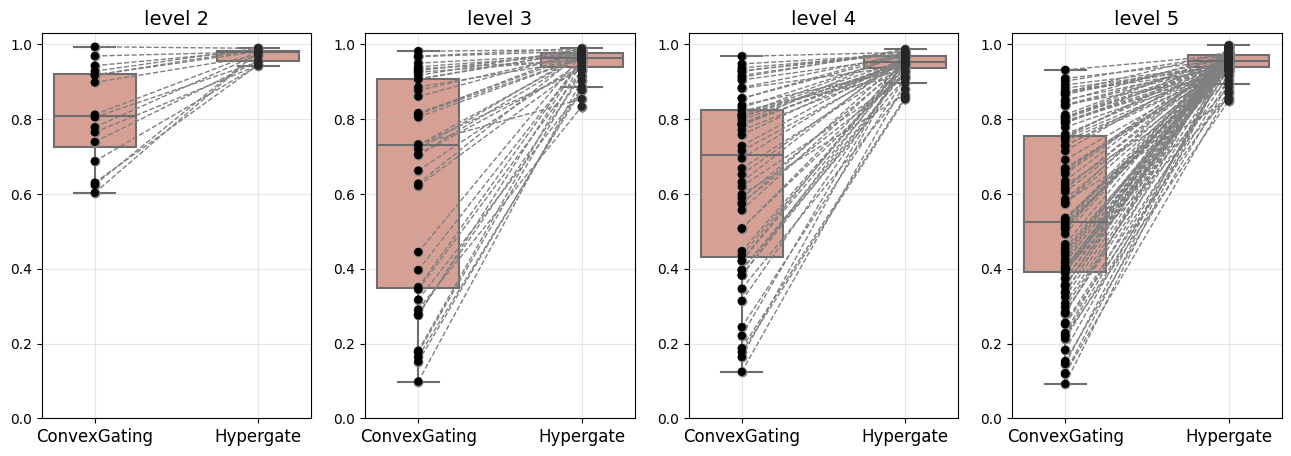

In [323]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
#Oetjen recall
sns.boxplot(data=comp_oetjen_lvl2_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_hypergate': 'Hypergate'}),order = ['ConvexGating','Hypergate'],width=0.5,ax = axes[0],color = '#e2998a')
sns.stripplot(data=comp_oetjen_lvl2_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_hypergate'],ax = axes[0])
for i in range(len(comp_oetjen_lvl2_recall)):
    axes[0].plot([0, 1], [comp_oetjen_lvl2_recall['recall_cg'][i], comp_oetjen_lvl2_recall['recall_hypergate'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 2',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl3_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_hypergate': 'Hypergate'}),order = ['ConvexGating','Hypergate'],width=0.5,ax = axes[1],color = '#e2998a')
sns.stripplot(data=comp_oetjen_lvl3_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_hypergate'],ax = axes[1])
for i in range(len(comp_oetjen_lvl3_recall)):
    axes[1].plot([0, 1], [comp_oetjen_lvl3_recall['recall_cg'][i], comp_oetjen_lvl3_recall['recall_hypergate'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 3',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl4_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_hypergate': 'Hypergate'}),order = ['ConvexGating','Hypergate'],width=0.5,ax = axes[2],color = '#e2998a')
sns.stripplot(data=comp_oetjen_lvl4_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_hypergate'],ax = axes[2])
for i in range(len(comp_oetjen_lvl4_recall)):
    axes[2].plot([0, 1], [comp_oetjen_lvl4_recall['recall_cg'][i], comp_oetjen_lvl4_recall['recall_hypergate'][i]], '--o', color='grey', linewidth=1)
#axes[2].set_xlabel('Conditions')
axes[2].set_title('level 4',fontsize = 14)
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=12) 
axes[2].set_ylim([0,1.03])
axes[2].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl5_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_hypergate': 'Hypergate'}),order = ['ConvexGating','Hypergate'],width=0.5,ax = axes[3],color = '#e2998a')
sns.stripplot(data=comp_oetjen_lvl5_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_hypergate'],ax = axes[3])
for i in range(len(comp_oetjen_lvl5_recall)):
    axes[3].plot([0, 1], [comp_oetjen_lvl5_recall['recall_cg'][i], comp_oetjen_lvl5_recall['recall_hypergate'][i]], '--o', color='grey', linewidth=1)
#axes[3].set_xlabel('Conditions')
axes[3].set_title('level 5',fontsize = 14)
axes[3].set_xticklabels(axes[3].get_xticklabels(), fontsize=12) 
axes[3].set_ylim([0,1.03])
axes[3].grid(True,alpha = 0.3)
plt.savefig('figures/Q01_cg_hypergate_oetjen_recall.pdf',bbox_inches='tight')